In [15]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy import stats
import seaborn as sea
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

tf.set_random_seed(123)    

In [16]:
dataSet = pd.read_csv('C:/Users/Antonio/Documents/GitHub/evaluacion-Lirb/Diabetes/diabetes.csv',
                       na_values='*', comment='\t',sep=',',skipinitialspace=True)
copy_DS = dataSet.copy()

In [17]:
def normalize(x):
   
    for i in x.columns:
        x[i] = (x[i]- x[i].min())/(x[i].max()- x[i].min())+1
       
    return 0
normalize(copy_DS)
normalize(dataSet)
copy_DS.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,1.491968,1.468326,1.346107,1.459818,1.451668,1.367725,1.360889,1.291996,1.485557,1.503942,1.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.320833,1.000000,1.214876,1.309859,1.329657,1.271165,1.237013,1.141044,1.357528,1.382576,1.193146
50%,1.516667,1.000000,1.318182,1.436620,1.436275,1.355578,1.337662,1.282087,1.478057,1.500000,1.359813
75%,1.666667,2.000000,1.465909,1.605634,1.552696,1.462649,1.464286,1.423131,1.610446,1.606061,1.580997
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


MSE: 0.027753


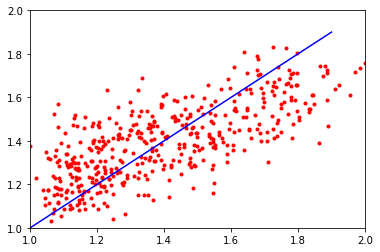

In [18]:
model = linear_model.LinearRegression()
model.fit(copy_DS[copy_DS.columns[:-1]],copy_DS['Y'])
y_predi = model.predict(copy_DS[copy_DS.columns[:-1]])
plt.plot(copy_DS['Y'], y_predi, '.r')
plt.plot(np.arange(1,2,0.1),np.arange(1,2,0.1),'b-')
plt.axis([1,2,1,2])
print("MSE: %.6f" % mean_squared_error(copy_DS['Y'], y_predi))

In [19]:
correlation_matrix=copy_DS.corr()
y_correlation = correlation_matrix['Y'].drop('Y')
y_correlation = y_correlation.sort_values(ascending = False)
index = y_correlation.index
index_length=len(index)
best = 10
variables= []
model = linear_model.LinearRegression()
for i in range(index_length):
    model.fit(copy_DS[index],copy_DS['Y'])
    y_pred = model.predict(copy_DS[index])
    regression_result = mean_squared_error(copy_DS['Y'],y_pred)
    if regression_result < best:
        best = regression_result
        variables = index
    index = index[:-1]
print(variables,best)

Index(['bmi', 's5', 'bp', 's4', 's6', 's1', 'age', 's2', 'sex', 's3'], dtype='object') 0.027752937168389922


In [20]:
def lambda_boxcox(dataframe,target,variables,best):
    model = linear_model.LinearRegression()
    boxcox_target,choosen_lambda = stats.boxcox(dataframe[target])
    if target == 'Y':
        model.fit(dataframe[variables],boxcox_target)
        y_pred = model.predict(dataframe[variables])
        regression_result = mean_squared_error(boxcox_target,y_pred)
    else:
        aux = dataframe
        aux[target] = boxcox_target
        model.fit(aux[variables],aux['Y'])
        y_pred = model.predict(aux[variables])
        regression_result = mean_squared_error(aux['Y'],y_pred)
    if regression_result >= best:
        return(1,best)
    else:
        dataframe[target] = stats.boxcox(dataframe[target],lmbda=choosen_lambda)
        return(choosen_lambda,regression_result)
choosen_lambda, best = lambda_boxcox(copy_DS,'Y',variables,best)
print('Y',choosen_lambda,best)
for i in range(index_length):
    choosen_lambda,best = lambda_boxcox(copy_DS,variables[i],variables,best)
    print(variables[i],choosen_lambda,best)

Y -0.7516610691746851 0.00859470882170373
bmi 1 0.00859470882170373
s5 1 0.00859470882170373
bp 1 0.00859470882170373
s4 1 0.00859470882170373
s6 1 0.00859470882170373
s1 1 0.00859470882170373
age 1 0.00859470882170373
s2 1 0.00859470882170373
sex 1 0.00859470882170373
s3 1 0.00859470882170373


In [21]:
dataSet['Y'],_ = stats.boxcox(dataSet['Y'])
dataSet.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,1.491968,1.468326,1.346107,1.459818,1.451668,1.367725,1.360889,1.291996,1.485557,1.503942,0.275400
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.132311
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.320833,1.000000,1.214876,1.309859,1.329657,1.271165,1.237013,1.141044,1.357528,1.382576,0.165375
50%,1.516667,1.000000,1.318182,1.436620,1.436275,1.355578,1.337662,1.282087,1.478057,1.500000,0.274428
75%,1.666667,2.000000,1.465909,1.605634,1.552696,1.462649,1.464286,1.423131,1.610446,1.606061,0.387521
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.540244


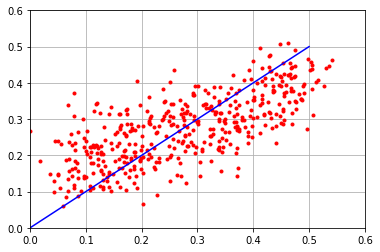

In [22]:
model = linear_model.LinearRegression()
model.fit(dataSet[dataSet.columns[:-1]],dataSet['Y'])
y_predi = model.predict(dataSet[dataSet.columns[:-1]])
plt.plot(dataSet['Y'], y_predi, '.r')
plt.plot(np.arange(0,0.6,0.1),np.arange(0,0.6,0.1),'b-')
plt.axis([-0,0.6,0,0.6])
plt.grid()


In [23]:
print("MSE: %.6f" % mean_squared_error(dataSet['Y'], y_predi))
print('R2: %.2f' % r2_score(dataSet['Y'], y_predi))
print('Intercept: %.06f' %model.intercept_)
print('Coef: ',model.coef_)

MSE: 0.008595
R2: 0.51
Intercept: -0.654670
Coef:  [ 0.00063492 -0.04064709  0.21198834  0.13144596 -0.41557075  0.32944923
  0.02702182  0.03966771  0.36891331  0.01872959]


In [24]:
dataset_train = dataSet.copy()
train_y = dataset_train['Y']
dataset_train.drop(columns='Y', inplace=True)

In [25]:
learning_rate = 0.0465
j = 1
epochs = 30000
errors_list = []
erros_mean = 0
best_error = 10
best_w = [[],[]]
for train, test in KFold(n_splits=10,shuffle=True,random_state=123).split(dataset_train):
    w0 = tf.Variable(tf.zeros(1, dtype=tf.float64))
    #w1 = tf.Variable(tf.random_uniform([10,1],minval=-10, maxval=10,seed=1234, dtype=tf.float64))
    w1 = tf.Variable(tf.truncated_normal([10, 1], mean=0,stddev=1, seed=1234, dtype=tf.float64))
    x = tf.constant(dataset_train.iloc[train])
    y = tf.constant(train_y.iloc[train])
     
    prediction = tf.add(w0,tf.matmul(x,w1))
    error = tf.reduce_mean(tf.square(tf.subtract(y, prediction)))

    init = tf.global_variables_initializer()
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(error)
    with tf.Session() as sess:
        sess.run(init)
        for i in list(range(epochs)):
            sess.run(optimizer)
        predictions = tf.add(w0,tf.matmul(dataset_train.iloc[test],w1))
        test_error = tf.reduce_mean(tf.square(tf.subtract(train_y.iloc[test], predictions)))
        errors_list.append(sess.run(test_error))
        errors_mean = sess.run(tf.reduce_mean(errors_list))
        if sess.run(test_error) < best_error:
            best_error = sess.run(test_error)
            best_w[0] = sess.run(w0)
            best_w[1] = sess.run(w1)   
print('Test error =', best_error, '\n')
print('W0=',best_w[0],'\n')
print('W1=',best_w[1])        
print('The mean of 10-Folds crossvalidation error is: %.6f' % errors_mean)

Test error = 0.013609196140322194 

W0= [0.57405385] 

W1= [[ 1.34220824e-05]
 [ 6.62617986e-05]
 [ 1.78473370e-03]
 [-1.38690528e-03]
 [ 2.92105821e-01]
 [-2.67030572e-01]
 [-1.27954127e-01]
 [-2.75940195e-02]
 [-9.92593107e-02]
 [ 4.28414664e-04]]
The mean of 10-Folds crossvalidation error is: 0.017559


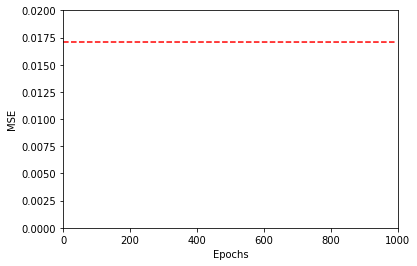

Test error = 0.018796569159624774 

W0= [0.57268605] 

W1= [[ 1.01164824e-04]
 [ 5.62511742e-04]
 [ 3.59461224e-03]
 [-7.75425907e-05]
 [ 2.86374012e-01]
 [-2.58013338e-01]
 [-1.27625685e-01]
 [-2.91241439e-02]
 [-1.00793946e-01]
 [-1.59740448e-03]]


In [26]:
dataset_train = dataSet.sample(frac=0.75,random_state=1234)
train_y = dataset_train['Y']
dataset_train.drop(columns='Y', inplace=True)
dataset_test = dataSet.drop(dataset_train.index)
test_y = dataset_test['Y']
dataset_test.drop(columns='Y', inplace=True)
points = [[], []]
epochs = 1000

w0 = tf.Variable(best_w[0])
#w1 = tf.Variable(tf.random_uniform([10,1],minval=-10, maxval=10,seed=1234, dtype=tf.float64))
w1 = tf.Variable(best_w[1])

x = tf.constant(dataset_train)
y = tf.constant(train_y)
     
prediction = tf.add(w0,tf.matmul(x,w1))
error = tf.reduce_mean(tf.square(tf.subtract(y, prediction)))

init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(error)
with tf.Session() as sess:
    sess.run(init)
    for i in list(range(epochs)):
        sess.run(optimizer)
        if i % 10 == 0:
            points[0].append(i)
            points[1].append(sess.run(error))
    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 0, 0.02])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()
    predictions = tf.add(w0,tf.matmul(dataset_test,w1))
    test_error = tf.reduce_mean(tf.square(tf.subtract(test_y, predictions)))
    
    print('Test error =', sess.run(test_error), '\n')
    print('W0=',sess.run(w0),'\n')
    print('W1=',sess.run(w1))